<a href="https://colab.research.google.com/github/jayakhan/document-classification/blob/main/naive_bayes_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1) Load Libraries

In [ ]:
from pathlib import Path
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
STOPWORDS = set(stopwords.words('english'))
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## 2) Load Dataset

In [18]:
# Adding Dataset into articles and labels list
articles = []
labels = []
with open('/content/20ng-train-stemmed.txt') as file:
  docs = file.readlines()
  for line in docs:
    labels.append(line.split('\t')[0])
    article = line.split('\t')[1]
    # Filter data based on STOPWORDS
    for word in STOPWORDS:
      token = ' ' + word + ' '
      article = article.replace(token, ' ')
      article = article.replace(' ', ' ')
    articles.append(article)

In [19]:
# Clean Label Names
labels_new = []
for i in labels:
  i = i.replace('.', '')
  i = i.replace('-', '')
  labels_new.append(i)

## 3) Plot Distribution of Articles across Labels

In [20]:
LABELS = ['altatheism', 'compgraphics', 'composmswindowsmisc', 'compsysibmpchardware', 'compsysmachardware', 'compwindowsx', 'miscforsale', 'recautos', 'recmotorcycles', 'recsportbaseball',
              'recsporthockey', 'scicrypt', 'scielectronics', 'scimed', 'scispace', 'socreligionchristian', 'talkpoliticsguns', 'talkpoliticsmideast', 'talkpoliticsmisc', 'talkreligionmisc']

In [21]:
labels = pd.DataFrame(labels_new)
new = pd.DataFrame(0, index=np.arange(len(labels)), columns=LABELS)

In [22]:
new['recmotorcycles'] = np.where(labels == 'recmotorcycles', 1, 0)
new['recsportbaseball'] = np.where(labels == 'recsportbaseball', 1, 0)
new['recsporthockey'] = np.where(labels == 'recsporthockey', 1, 0)
new['scicrypt'] = np.where(labels == 'scicrypt', 1, 0)
new['scielectronics'] = np.where(labels == 'scielectronics', 1, 0)
new['scimed'] = np.where(labels == 'scimed', 1, 0)
new['scispace'] = np.where(labels == 'scispace', 1, 0)
new['socreligionchristian'] = np.where(labels == 'socreligionchristian', 1, 0)
new['talkpoliticsguns'] = np.where(labels == 'talkpoliticsguns', 1, 0)
new['talkpoliticsmideast'] = np.where(labels == 'talkpoliticsmideast', 1, 0)
new['talkpoliticsmisc'] = np.where(labels == 'talkpoliticsmisc', 1, 0)
new['talkreligionmisc'] = np.where(labels == 'talkreligionmisc', 1, 0)
new['recautos'] = np.where(labels == 'recautos', 1, 0)
new['altatheism'] = np.where(labels == 'altatheism', 1, 0)
new['compgraphics'] = np.where(labels == 'compgraphics', 1, 0)
new['composmswindowsmisc'] = np.where(labels == 'composmswindowsmisc', 1, 0)
new['compsysibmpchardware'] = np.where(labels == 'compsysibmpchardware', 1, 0)
new['compsysmachardware'] = np.where(labels == 'compsysmachardware', 1, 0)
new['compwindowsx'] = np.where(labels == 'compwindowsx', 1, 0)
new['miscforsale'] = np.where(labels == 'miscforsale', 1, 0)

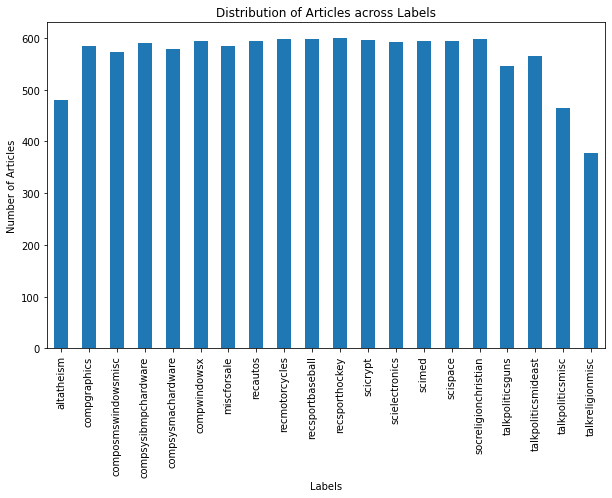

In [23]:
# Plot label data
plt.figure(figsize=(10,6))
new.sum(axis=0).plot.bar()
plt.xlabel("Labels")
plt.ylabel("Number of Articles")
plt.title("Distribution of Articles across Labels")
plt.show()

## 4) Split data into 80% training and 20% validation datasets

In [24]:
train_articles, validation_articles, train_labels, validation_labels = train_test_split(articles, labels_new, test_size=0.3, stratify=labels_new)

In [25]:
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

7905
7905
3388
3388


## 5) Lemmatization and Vectorization

In [26]:
"""This class uses WordNetLemmatizer to stem words with length more than two"""
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()

    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc) if len(t) >= 2]

In [27]:
# Load CountVectorizer API
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(input='content', analyzer='word', tokenizer=LemmaTokenizer(), max_features=2000)

In [28]:
# Convert Articles to their vector sparse representation
X_train_cv = cv.fit_transform(train_articles)
X_test_cv = cv.transform(validation_articles)

## 6) Model Building

In [ ]:
#Train the model
naive_bayes = MultinomialNB(alpha=1)
naive_bayes.fit(X_train_cv, train_labels)

In [30]:
#Predict labels for validation dataset via trained model
predictions = naive_bayes.predict(X_test_cv)

In [31]:
predictions

array(['talkpoliticsguns', 'compgraphics', 'scicrypt', ...,
       'recsportbaseball', 'compsysmachardware', 'recsportbaseball'],
      dtype='<U20')

## 7) Model Evaluation

In [34]:
print('Accuracy score: ', accuracy_score(validation_labels, predictions))
print('Precision score: ', precision_score(validation_labels, predictions, average='weighted', labels=np.unique(validation_labels)))
print('Recall score: ', recall_score(validation_labels, predictions, average='weighted', labels=np.unique(validation_labels)))
print('F1 score: ', f1_score(validation_labels, predictions, average='weighted', labels=np.unique(validation_labels)))

Accuracy score:  0.8031286894923259
Precision score:  0.8029483341069669
Recall score:  0.8031286894923259
F1 score:  0.8021808701050116


In [35]:
from sklearn.metrics import classification_report
print(classification_report(validation_labels, predictions, target_names=LABELS))

                      precision    recall  f1-score   support

          altatheism       0.80      0.78      0.79       144
        compgraphics       0.72      0.74      0.73       175
 composmswindowsmisc       0.70      0.76      0.73       172
compsysibmpchardware       0.68      0.62      0.65       177
  compsysmachardware       0.71      0.73      0.72       173
        compwindowsx       0.80      0.74      0.77       178
         miscforsale       0.69      0.64      0.66       176
            recautos       0.80      0.86      0.83       178
      recmotorcycles       0.81      0.91      0.86       179
    recsportbaseball       0.88      0.88      0.88       179
      recsporthockey       0.92      0.93      0.93       180
            scicrypt       0.93      0.87      0.90       179
      scielectronics       0.77      0.74      0.75       177
              scimed       0.89      0.92      0.91       178
            scispace       0.87      0.86      0.86       178
socreli

## 8) Create Synthetic Data

In [ ]:
# Fetch feature parameters from trained model
predictions_prob = naive_bayes.predict_log_proba(X_test_cv)
beta = naive_bayes.feature_log_prob_
classes = naive_bayes.classes_
word_freq = pd.DataFrame(X_train_cv.toarray(), columns=cv.get_feature_names())

In [ ]:
# Adding label names to word log probability distribution
beta_lables = pd.DataFrame(data=beta, index=classes)
beta_lables

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
altatheism,-7.397979,-8.409580,-7.055034,-8.091126,-10.489022,-10.489022,-10.489022,-5.935145,-8.409580,-8.409580,-7.849964,-7.849964,-7.849964,-8.697262,-10.489022,-8.697262,-6.428579,-6.481688,-7.230925,-8.186437,-9.102727,-8.091126,-8.697262,-8.091126,-7.849964,-7.780971,-10.489022,-9.102727,-7.397979,-8.543112,-9.390409,-10.489022,-8.543112,-9.102727,-7.849964,-9.390409,-8.543112,-7.924072,-7.655808,-10.489022,...,-10.489022,-8.409580,-9.390409,-8.697262,-10.489022,-9.390409,-10.489022,-10.489022,-9.795875,-10.489022,-8.879584,-7.270146,-6.254915,-8.186437,-8.543112,-5.685001,-6.394677,-10.489022,-6.171534,-8.186437,-7.055034,-7.193185,-8.409580,-8.543112,-9.102727,-4.420596,-7.849964,-6.905503,-6.094573,-6.330139,-10.489022,-10.489022,-8.409580,-6.212356,-9.102727,-9.390409,-7.023286,-7.849964,-9.795875,-10.489022
compgraphics,-8.424283,-9.810577,-9.117430,-9.810577,-8.306500,-8.424283,-8.557814,-7.284848,-6.948376,-9.810577,-9.117430,-9.117430,-10.503724,-8.894286,-9.117430,-8.201139,-9.117430,-8.711965,-8.557814,-9.117430,-7.670511,-8.557814,-8.306500,-7.864667,-7.459202,-5.971125,-8.201139,-8.894286,-8.894286,-6.344841,-7.938775,-9.810577,-8.306500,-10.503724,-9.405112,-10.503724,-9.117430,-9.405112,-8.306500,-10.503724,...,-7.613352,-10.503724,-8.894286,-8.424283,-5.513292,-10.503724,-10.503724,-9.810577,-8.201139,-10.503724,-9.117430,-8.557814,-8.894286,-7.325670,-10.503724,-7.245628,-5.453868,-6.866138,-6.766055,-8.306500,-8.424283,-10.503724,-9.810577,-7.731135,-10.503724,-4.905302,-9.117430,-6.719535,-7.670511,-6.866138,-8.894286,-9.405112,-9.117430,-6.514740,-8.894286,-8.105829,-7.559285,-8.894286,-6.611904,-10.503724
composmswindowsmisc,-7.608829,-10.093736,-8.484298,-9.400589,-7.608829,-10.093736,-7.695841,-7.454679,-5.616399,-10.093736,-7.098004,-8.995124,-10.093736,-9.400589,-9.400589,-8.014294,-8.995124,-9.400589,-8.301976,-7.260523,-7.695841,-8.707442,-8.014294,-7.203364,-7.385686,-6.287073,-7.454679,-9.400589,-8.484298,-6.287073,-7.695841,-8.301976,-8.301976,-10.093736,-8.995124,-8.484298,-9.400589,-7.896511,-10.093736,-10.093736,...,-9.400589,-9.400589,-8.707442,-4.957938,-3.266107,-8.707442,-9.400589,-10.093736,-8.995124,-10.093736,-8.995124,-9.400589,-9.400589,-6.874860,-10.093736,-6.797899,-5.012332,-7.608829,-6.958242,-8.707442,-8.147826,-10.093736,-8.301976,-7.454679,-10.093736,-4.646999,-8.995124,-7.454679,-6.692539,-6.915682,-10.093736,-9.400589,-8.014294,-6.797899,-9.400589,-8.995124,-7.321147,-8.995124,-6.356066,-10.093736
compsysibmpchardware,-8.001839,-9.505916,-9.505916,-9.505916,-7.714157,-10.199063,-7.426475,-7.491013,-6.228771,-10.199063,-7.801168,-8.253153,-10.199063,-10.199063,-9.100451,-7.896478,-8.001839,-10.199063,-7.714157,-8.119622,-7.634114,-8.589625,-7.108021,-7.426475,-7.714157,-6.173712,-7.896478,-9.505916,-9.100451,-6.071929,-7.896478,-8.253153,-7.203331,-10.199063,-8.589625,-9.505916,-9.505916,-9.505916,-10.199063,-10.199063,...,-10.199063,-10.199063,-8.407304,-6.765076,-5.293789,-8.589625,-10.199063,-9.505916,-6.797866,-9.505916,-8.812769,-9.505916,-9.505916,-7.560006,-9.100451,-7.491013,-4.910796,-8.812769,-7.308692,-10.199063,-8.589625,-9.505916,-8.812769,-7.634114,-9.505916,-4.876053,-8.812769,-7.801168,-6.831768,-6.588145,-10.199063,-10.199063,-7.714157,-6.940967,-9.100451,-10.199063,-7.154541,-9.100451,-8.001839,-9.505916
compsysmachardware,-8.192056,-8.528529,-8.192056,-10.137967,-9.039354,-10.137967,-6.331304,-8.528529,-6.500380,-9.444819,-8.346207,-8.751672,-10.137967,-8.528529,-10.137967,-7.940742,-8.346207,-8.528529,-7.653060,-8.751672,-7.142234,-7.653060,-6.206141,-6.805762,-7.093444,-6.582619,-7.940742,-10.137967,-9.039354,-6.400297,-7.653060,-7.940742,-7.

In [ ]:
# Vocabulary details
vocabulary = word_freq.columns.values.tolist()
len(vocabulary)

2000

In [ ]:
"""This function picks random words for randomly selected articles by using multinomial distribution"""
def text_gen(vocabulary, word_distribution, word_distribution_labels):
  words = []
  docs = []
  idx = int(np.random.randint(20, size=1))
  docs.append(word_distribution_labels.index[idx])
  word_proportions = np.random.multinomial(2000, np.exp(word_distribution[idx]))
  for _ in range(500):
    words.append(random.choices(vocabulary, word_proportions)[0])
  return words, docs

In [ ]:
# Generate 3000 articles
documents = [
        text_gen(vocabulary, beta, beta_lables)
        for _ in range(3000)
    ]

In [ ]:
# Modify generated data to match the format of original dataset
synthetic_data = [''.join(i[1]) + '\t' + ' '.join(i[0]) for i in documents]
synthetic_data[:10]

['talkpoliticsmisc\tthi time combin form predict lost edu stephanopoulo ag edu channel bad mirror religion argu comment legitim charg work repeat edu remark write thing sexual bob thi cramer help ban btw peopl hous benefit navi feel case frequent make knew hous set agent year man risk half human feel anti provid debat male proceed difficult close group full start long convers numer pat typic drink want wonder account defend young base chanc even articl religion articl europ respond across aid gov danger hand peopl search peopl two tax young respons area survei great peopl vote hope write aim war expo industri remark thi goal base pick work call sinc dai want minor fact nasa quot major trial task sale moment countri network form primari aid econom citi system david affect exist number charg survei bring shut free penalti want thi write multi talk forc gif mind make thi sen back ncr repres south stop posit full legitim action respond plant articl bob law individu singl truth write major 

In [ ]:
# Write synthetic dataset to text file
with open("synthetic_data_v2.txt", mode="w") as outfile:
    for s in synthetic_data:
        outfile.write("%s\n" % s)